In [64]:
# Playing Around with Diffusion Limited Aggregation
# References:
# [1] https://youtu.be/gsJHzBTPG0Y?si=0maOxOH9jy3uw_pa&t=588
# [2] https://en.wikipedia.org/wiki/Diffusion-limited_aggregation

![DLA Example](./DLA/DLA_Example.jpg)

In [65]:
#Imports and Installs
import numpy as np
import csv
import random
import time
import matplotlib.pyplot as plt
from IPython import display

In [66]:
# Coordinates of Grid
grid_size = 400
x_cords = range(0,grid_size)
y_cords = range(0,grid_size)
isBlock = np.zeros((len(x_cords),len(x_cords)))

In [67]:
#Starting Block // Seed
firstBlock_x, firstBlock_y = int(grid_size/2), int(grid_size/2)
isBlock[firstBlock_x, firstBlock_y] = True

In [68]:
# Function to call to update availableMatrix from isBlock
def get_used_indicies(matrix):
    return [(i, j) for i in range(len(matrix)) for j in range(len(matrix[0])) if matrix[i][j] == 1]


In [69]:
# Get next random next index to place block and check against
# array of available indices

def get_unique_random_index(rows, cols, used_indices):
    # Create list of all available indicies
    all_indices = [(i, j) for i in range(rows) for j in range(cols)]
    available_indices = list(set(all_indices) - set(used_indices))

    # Raise error if no index is available
    if not available_indices:
        raise ValueError("No available indices left to pick from.")
    
    #use random choice to pick a new random index
    chosen_index = random.choice(available_indices)    
    return chosen_index


In [70]:
# Random Walking Direction until Hit
def move_random_adjacent(index, rows, cols, known_indices):
    i, j = index
    directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    attempt = 0
    walk_starts = time.time()
    new_i, new_j = i, j
    while True:
        attempt+=1
        di, dj = random.choice(directions)
        last_i, last_j = new_i, new_j
        new_i, new_j = (new_i + di) % rows, (new_j + dj) % cols
        # print('New Step:',new_i, new_j)
        if (new_i, new_j) in known_indices:
            # print('Block Found')
            walk_ends = time.time()
            time_walking = walk_ends-walk_starts
            return last_i, last_j, attempt, time_walking

In [71]:
# Starting Available Matrix
usedIndices = get_used_indicies(isBlock)

In [72]:
# Time for that block to walk until it hits an existing block

# How many blocks to play
totalBlock = 15000

#init
attempt_arr = []
timeWalked_arr = []

for n in range(totalBlock):
    print('Placing Block #',n,'out of',totalBlock)
    # Get Next Random Index to Place Block
    NextBlockInd = get_unique_random_index(len(x_cords),len(y_cords), usedIndices)

    # Move from next block start until you hit a existing block
    last_x, last_y, attempt,timeWalked = move_random_adjacent(NextBlockInd, len(x_cords),len(y_cords), usedIndices)
    attempt_arr = np.append(attempt_arr, attempt)
    timeWalked_arr = np.append(timeWalked_arr, timeWalked)
    print('Required Steps:', attempt)
    print('Time Walked:', timeWalked, '\n')
    
    # Given last index when last block hit update isBlock
    isBlock[last_x, last_y] = True
    
    # Update Available List
    usedIndices = get_used_indicies(isBlock)

    # Ever 10 blocks clear display and save current state of matrix
    if n % 10 == 9:
        display.clear_output()
        #Save isBlock, allowing for this to be done over multiple execs
        with open("./DLA/isBlock.csv", mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerows(isBlock)
        with open("./DLA/isBlock_info.csv", mode="w", newline="") as file:
            writer = csv.writer(file)
            writer.writerows([attempt_arr])
            writer.writerows([timeWalked_arr])

display.clear_output()
#Save isBlock, allowing for this to be done over multiple execs
with open("./DLA/isBlock.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(isBlock)
with open("./DLA/isBlock_info.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows([attempt_arr])
    writer.writerows([timeWalked_arr]) 
print('Program Complete')

Program Complete


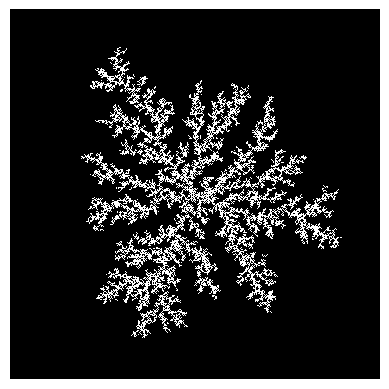

In [73]:
plt.imshow(isBlock, cmap='gray', interpolation='nearest')
plt.axis('off')
# plt.savefig('./DLA/40kPixels6kBlocks')
plt.show()


#### Loading Specific Data

In [13]:
# Read the data

with open("./DLA/40kPixels12kBlocks.csv", mode="r") as file:
    reader = csv.reader(file)
    data1 = [list(map(float, row)) for row in reader]

# Split into separate matrices
isBlock = data1[:]

# Improperly saved data for first run
# with open("./DLA/40kPixels12kBlocks_info.csv", mode="r") as file:
#     reader = csv.reader(file)
#     data2 = [list(map(float, row)) for row in reader]
    
# attempt_arr = data2[0]
# timeWalked_arr = data2[1]

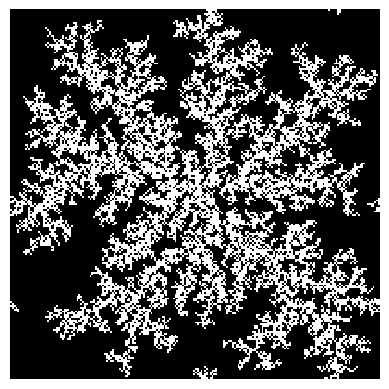

In [14]:
plt.imshow(isBlock, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.savefig('./DLA/40kPixels12kBlocks')
plt.show()


#### lets try with 6k blocks

In [18]:
# Read the data

with open("./DLA/6kPixels12kBlocks.csv", mode="r") as file:
    reader = csv.reader(file)
    data1 = [list(map(float, row)) for row in reader]

# Split into separate matrices
isBlock = data1[:]

# Messed up again
# with open("./DLA/6kPixels12kBlocks_info.csv", mode="r") as file:
#     reader = csv.reader(file)
#     data2 = [list(map(float, row)) for row in reader]
    
# attempt_arr = data2[0]
# timeWalked_arr = data2[1]

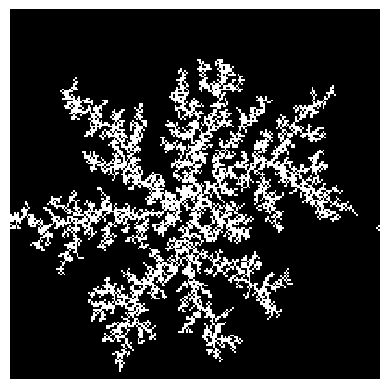

In [19]:
plt.imshow(isBlock, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.savefig('./DLA/40kPixels6kBlocks')
plt.show()


#### Try again with 8k

In [48]:
# Read the data

with open("./DLA/40kPixels8kBlocks.csv", mode="r") as file:
    reader = csv.reader(file)
    data1 = [list(map(float, row)) for row in reader]

# Split into separate matrices
isBlock = data1[:]

with open("./DLA/40kPixels8kBlocks_info.csv", mode="r") as file:
    reader = csv.reader(file)
    data2 = [list(map(float, row)) for row in reader]
    
attempt_arr = data2[0]
timeWalked_arr = data2[1]

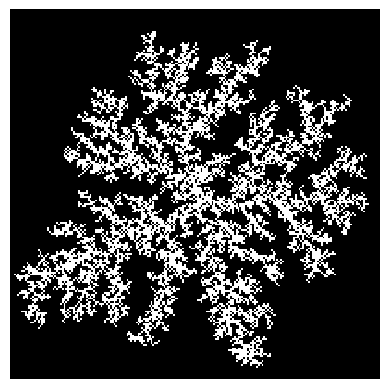

In [49]:
plt.imshow(isBlock, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.savefig('./DLA/40kPixels8kBlocks')
plt.show()


In [50]:
# lets looks at info

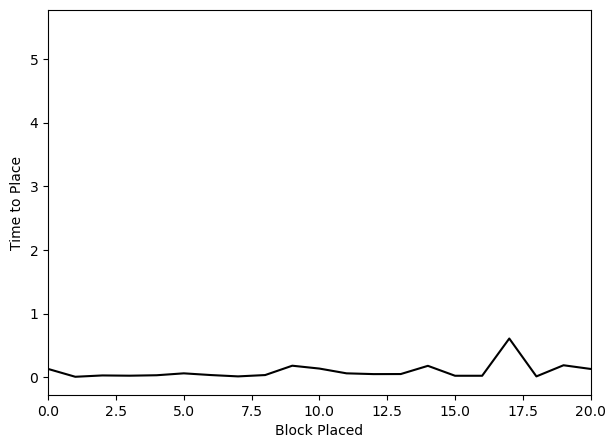

In [51]:
plt.figure(figsize=(7,5))
plt.plot(range(len(timeWalked_arr)),timeWalked_arr, color = 'k')
plt.ylabel('Time to Place')
plt.xlabel('Block Placed')
plt.xlim(0,20)
plt.show()

Total time to finish:  30.94 minutes


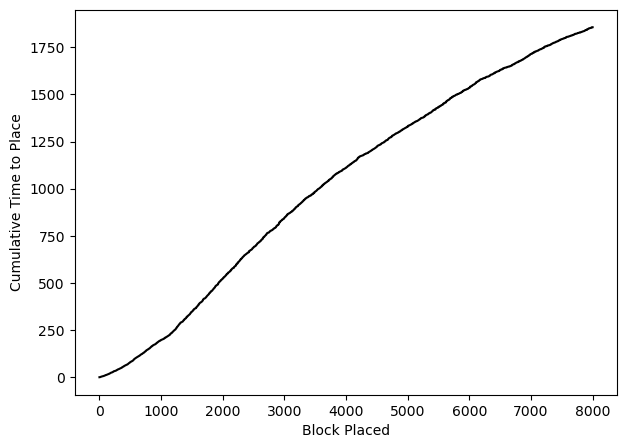

In [56]:
plt.figure(figsize=(7,5))
plt.plot(range(len(timeWalked_arr)), np.cumsum(timeWalked_arr), color = 'k')
plt.ylabel('Cumulative Time to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,20)
print('Total time to finish: ', np.round(np.sum(timeWalked_arr)/60,2), 'minutes')
plt.show()

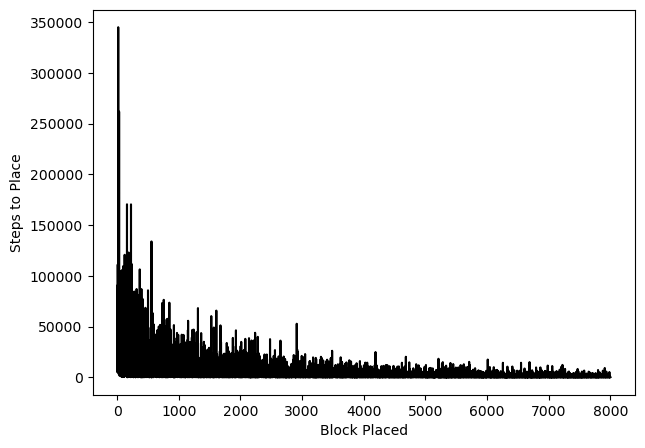

In [53]:
plt.figure(figsize=(7,5))
plt.plot(range(len(attempt_arr)),attempt_arr, color = 'k')
plt.ylabel('Steps to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,20)
plt.show()

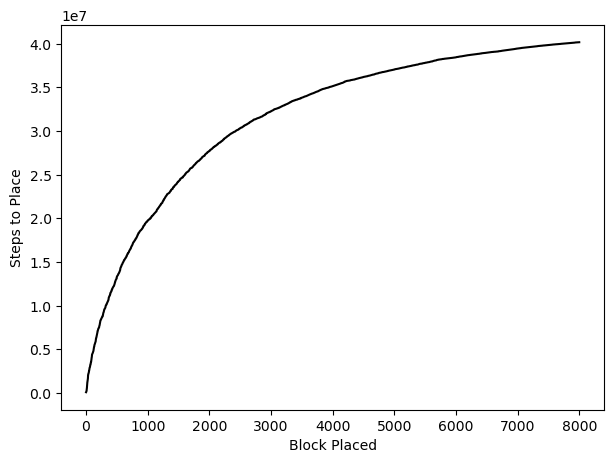

Total steps to finish:  40.18 Msteps.


In [63]:
plt.figure(figsize=(7,5))
plt.plot(range(len(attempt_arr)),np.cumsum(attempt_arr), color = 'k')
plt.ylabel('Steps to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,20)
plt.show()
print('Total steps to finish: ', np.round(np.sum(attempt_arr)/1e6,2),'Msteps.')

#### 160k Pixels with 15k Blocks

In [26]:
# Read the data

with open("./DLA/160kPixels15kBlocks.csv", mode="r") as file:
    reader = csv.reader(file)
    data1 = [list(map(float, row)) for row in reader]

# Split into separate matrices
isBlock = data1[:]

with open("./DLA/160kPixels15kBlocks_info.csv", mode="r") as file:
    reader = csv.reader(file)
    data2 = [list(map(float, row)) for row in reader]
    
attempt_arr = data2[0]
timeWalked_arr = data2[1]

148


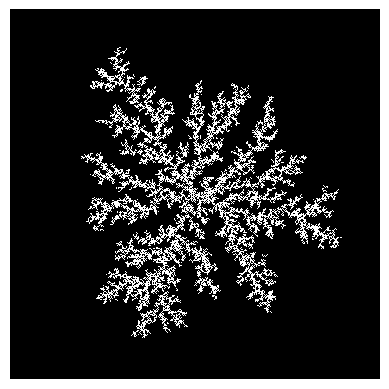

In [94]:
plt.imshow(isBlock, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.savefig('./DLA/160kPixels15kBlocks')
plt.show()


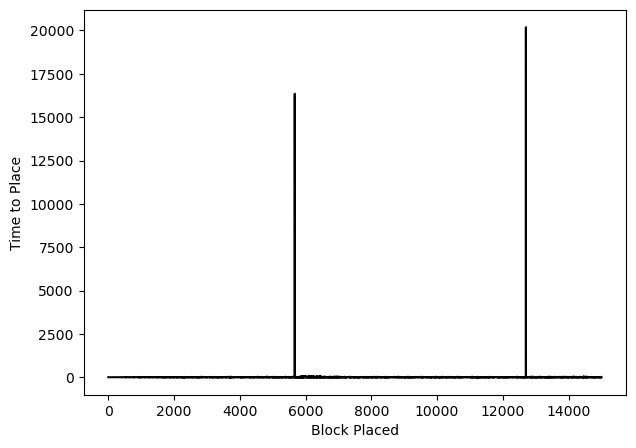

In [85]:
plt.figure(figsize=(7,5))
plt.plot(range(len(timeWalked_arr)),timeWalked_arr, color = 'k')
plt.ylabel('Time to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,50)
plt.show()

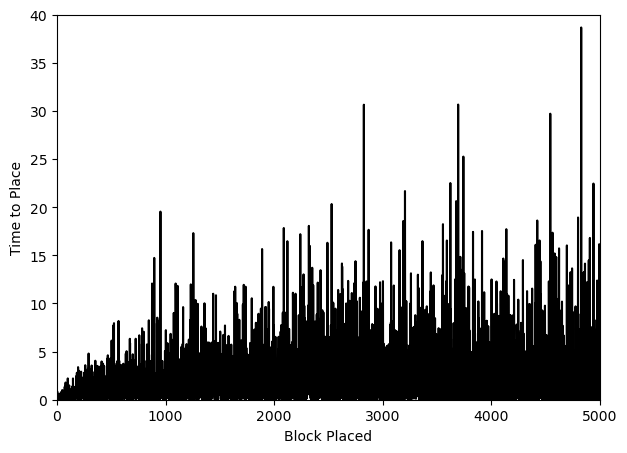

In [90]:
plt.figure(figsize=(7,5))
plt.plot(range(len(timeWalked_arr)),timeWalked_arr, color = 'k')
plt.ylabel('Time to Place')
plt.xlabel('Block Placed')
plt.xlim(0,5000)
plt.ylim(0,40)
plt.show()

Total time to finish:  1403.44 minutes


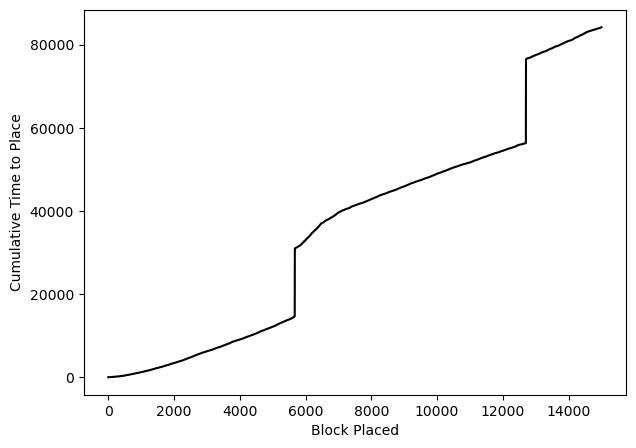

In [75]:
plt.figure(figsize=(7,5))
plt.plot(range(len(timeWalked_arr)), np.cumsum(timeWalked_arr), color = 'k')
plt.ylabel('Cumulative Time to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,20)
print('Total time to finish: ', np.round(np.sum(timeWalked_arr)/60,2), 'minutes')
plt.show()

Total time to finish:  1403.44 minutes


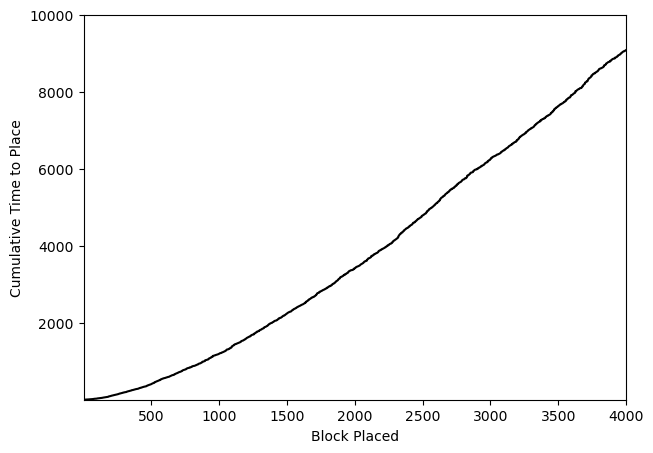

In [84]:
plt.figure(figsize=(7,5))
plt.plot(range(len(timeWalked_arr)), np.cumsum(timeWalked_arr), color = 'k')
plt.ylabel('Cumulative Time to Place')
plt.xlabel('Block Placed')
plt.xlim(1,4000)
plt.ylim(1,10000)
print('Total time to finish: ', np.round(np.sum(timeWalked_arr)/60,2), 'minutes')
plt.show()

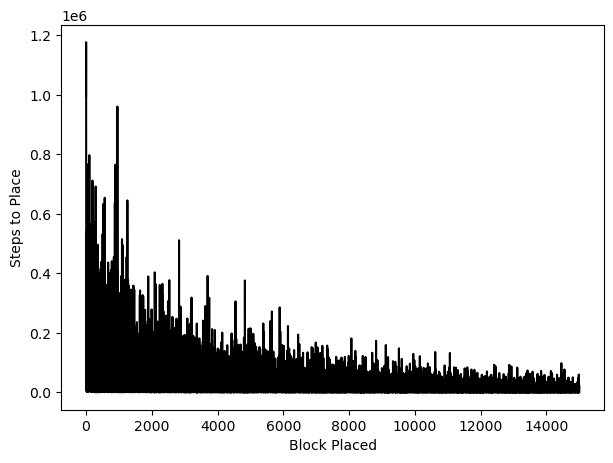

In [76]:
plt.figure(figsize=(7,5))
plt.plot(range(len(attempt_arr)),attempt_arr, color = 'k')
plt.ylabel('Steps to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,20)
plt.show()

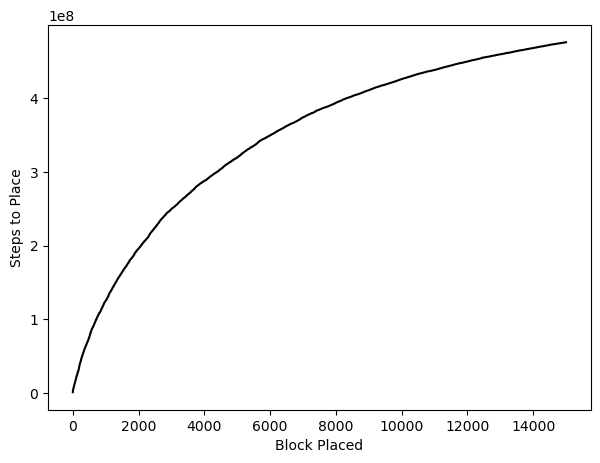

Total steps to finish:  475.89 Msteps.


In [77]:
plt.figure(figsize=(7,5))
plt.plot(range(len(attempt_arr)),np.cumsum(attempt_arr), color = 'k')
plt.ylabel('Steps to Place')
plt.xlabel('Block Placed')
# plt.xlim(0,20)
plt.show()
print('Total steps to finish: ', np.round(np.sum(attempt_arr)/1e6,2),'Msteps.')